In [1]:
import numpy as np
from scipy.spatial import distance
import ot
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import datasets
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.gaussian_process.kernels import RBF
from HOTDA import *
from sklearn.cluster import SpectralClustering
import numpy as np
#import cv2,os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import glob
from matplotlib import pyplot
import seaborn as sns
import warnings
import pylab as pl
import numpy as np
import scipy as sp
import ot
import pylab as pl
import numpy as np
import ot
from ot.datasets import make_data_classif
from ot.datasets import make_data_classif
warnings.filterwarnings("ignore")
%matplotlib notebook

In [2]:
da = 1.5
def plot_ax(dec, name):
    pl.plot([dec[0], dec[0]], [dec[1] - da, dec[1] + da], 'k', alpha=0.5)
    pl.plot([dec[0] - da, dec[0] + da], [dec[1], dec[1]], 'k', alpha=0.5)
    pl.text(dec[0] - .5, dec[1] + 2, name)

In [3]:
def print_G(G, xs, ys, xt):
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            if G[i, j] > 5e-4:
                if ys[i]:
                    c = 'b'
                else:
                    c = 'r'
                pl.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]], c, alpha=.2)

In [4]:
def print_G1(G, xs, xt):
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
                c = 'b'
                pl.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]], c, alpha=.2)
def print_G2(G, xs, xt):
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
                c = 'r'
                pl.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]], c, alpha=.2)
                                

In [5]:
def Source_processing(X,y):  
    S=[]
    a=[]
    yc_source=[]
    classes=np.unique(y)
    k=len(classes)   
    mu=np.ones(k)/k  #We give the same mass for each structures to overcame the probleme of unbalanced structures. 
    for i in range(k): 
        C=X[y==i]
        yc_source=yc_source+y[y==i].tolist()
        w=np.ones(C.shape[0])/C.shape[0]
        S.append(C)
        a.append(w)
    mu=np.array(mu)
    return S,a,mu,yc_source
def Mapping(S,T,a,b,HOT):
    index=np.argmax(HOT,1)
    Transported_S=[]
    for i in range(len(S)):
        M=distance.cdist(S[i],T[index[i]], metric='sqeuclidean')
        OT=ot.bregman.sinkhorn_knopp(a[i],b[index[i]],M,reg=1)
        if i==0:
            OT0=ot.bregman.sinkhorn_knopp(a[i],b[index[i]],M,reg=0.1) 
        Transported_Source=np.linalg.inv(np.diag(OT.dot(np.ones(T[index[i]].shape[0])))).dot(OT).dot(T[index[i]])
        Transported_S.append(Transported_Source)
    return Transported_S,OT0,S[0],T[index[0]],OT,S[1],T[index[1]]

In [6]:
def plot_data(xs1, ys1,xt, yt,unbalance):
    plt.figure()
    plt.scatter(xs1[:, 0], xs1[:, 1], c=ys1, s=35, marker='.', cmap='Set1',label='Source data', vmax=9,)
    plt.scatter(xt[:, 0], xt[:, 1], c=yt, s=35, marker='>', cmap='Set1',label='Target data', vmax=9,)
    if(unbalance==0):
        plt.title('Balance')
    if(unbalance>0):
        plt.title('Moderate unbalance')  
    if(unbalance<0):
        plt.title('Extreme unbalance')
    plt.legend(loc=0)
    plt.show()

In [7]:
def plot_Reg_OT(xs1, ys1,xt, yt,unbalance):   
    plt.figure()
    ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1, metric='sqeuclidean')
    print_G(ot_sinkhorn.fit(Xs=xs1, ys=ys1, Xt=xt).coupling_, xs1, ys1, xt)
    plt.scatter(xs1[:, 0], xs1[:, 1], c=ys1, s=35, marker='.',label='Source data', cmap='Set1', vmax=9)
    plt.scatter(xt[:, 0], xt[:, 1], c=yt, s=35, marker='>', cmap='Set1',label='Target data', vmax=9)
    if(unbalance==0):
        plt.title('Balance - Reg-OT')
    if(unbalance>0):
        plt.title('Moderate unbalance - Reg-OT')  
    if(unbalance<0):
        plt.title('Extreme unbalance - Reg-OT')
    plt.plot([], [], 'r', alpha=.2, label='Mass from Class 1')
    plt.plot([], [], 'b', alpha=.2, label='Mass from Class 2')
    plt.legend(loc=0)
    plt.show()

In [8]:
def plot_OT_GL(xs1, ys1,xt, yt,unbalance):  
    plt.figure()
    ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
    print_G(ot_lpl1.fit(Xs=xs1, ys=ys1, Xt=xt).coupling_, xs1, ys1, xt)
    plt.scatter(xs1[:, 0], xs1[:, 1], c=ys1, s=35, marker='.',label='Source data', cmap='Set1', vmax=9)
    plt.scatter(xt[:, 0], xt[:, 1], c=yt, s=35, marker='>',label='Target data', cmap='Set1', vmax=9)
    if(unbalance==0):
        plt.title('Balance - OT-GL')
    if(unbalance>0):
        plt.title('Moderate unbalance - OT-GL')  
    if(unbalance<0):
        plt.title('Extreme unbalance - OT-GL')
    plt.plot([], [], 'r', alpha=.2, label='Mass from Class 1')
    plt.plot([], [], 'b', alpha=.2, label='Mass from Class 2')
    plt.legend(loc=0)
    plt.show()

In [9]:
def plot_GW(xs1, ys1,xt, yt,unbalance):   
    plt.figure()
    C1 = sp.spatial.distance.cdist(xs1, xs1)
    C2 = sp.spatial.distance.cdist(xt, xt)
    C1 /= C1.max()
    C2 /= C2.max()
    p = ot.unif(xs1.shape[0])
    q = ot.unif(xt.shape[0])
    gw0, log0 = ot.gromov.gromov_wasserstein(C1, C2, p, q, 'square_loss', verbose=False, log=True)
    print_G(gw0, xs1, ys1, xt)
    plt.scatter(xs1[:, 0], xs1[:, 1], c=ys1, s=35, marker='.',label='Source data', cmap='Set1', vmax=9)
    plt.scatter(xt[:, 0], xt[:, 1], c=yt, s=35, marker='>',label='Target data', cmap='Set1', vmax=9)
    if(unbalance==0):
        plt.title('Balance - GW')
    if(unbalance>0):
        plt.title('Moderate unbalance - GW')  
    if(unbalance<0):
        plt.title('Extreme unbalance - GW')
    plt.plot([], [], 'r', alpha=.2, label='Mass from Class 1')
    plt.plot([], [], 'b', alpha=.2, label='Mass from Class 2')
    plt.legend(loc=0)
    plt.show()

In [10]:
def plot_HOT(xs1, ys1,xt, yt,unbalance):
    clustering = SpectralClustering(n_clusters=2).fit(xt)
    S,a,mu,yxs=Source_processing(xs1, ys1)
    yxs=np.array(yxs).flatten().tolist()
    T,b,nu,yxyys=Source_processing(xt,clustering.labels_)
    W=np.zeros((len(S),len(T)))
    OTl=[]
    for i in range(len(S)):
        for j in range(len(T)):
            M=distance.cdist(S[i],T[j], metric='sqeuclidean')
            OT=ot.bregman.sinkhorn_knopp(a[i],b[j],M,reg=1e-1)
            OTl.append(OT)
            W[i][j] = np.trace(np.dot(OT.T,M))
    HOT=ot.bregman.sinkhorn_knopp(mu,nu,W,reg=1e-1)
    Transported_S,o,s0,t0,o1,s1,t1=Mapping(S,T,a,b,HOT)
    X_Transported_S=Transported_S[0].tolist()+Transported_S[1].tolist()
    y_Transported_S=np.array(yxs).flatten()
    classifier = svm.SVC()
    classifier.fit(X_Transported_S,y_Transported_S)
    fig = plt.figure()
    plt.clf()
    print_G2(o, s0, t0)
    print_G1(o1, s1, t1)
    plt.scatter(xs1[:, 0], xs1[:, 1], c=ys1, s=35, marker='.', cmap='Set1',label='Source data', vmax=9)
    plt.scatter(xt[:, 0], xt[:, 1], c=yt, s=35, marker='>', cmap='Set1',label='Target data', vmax=9)
    plt.plot([], [], 'r', alpha=.2, label='Mass from Class 1')
    plt.plot([], [], 'b', alpha=.2, label='Mass from Class 2')
    if(unbalance==0):
        plt.title('Balance - HOT')
    if(unbalance>0):
        plt.title('Moderate unbalance - HOT')  
    if(unbalance<0):
        plt.title('Extreme unbalance - HOT')
    plt.legend(loc=0)

<IPython.core.display.Javascript object>


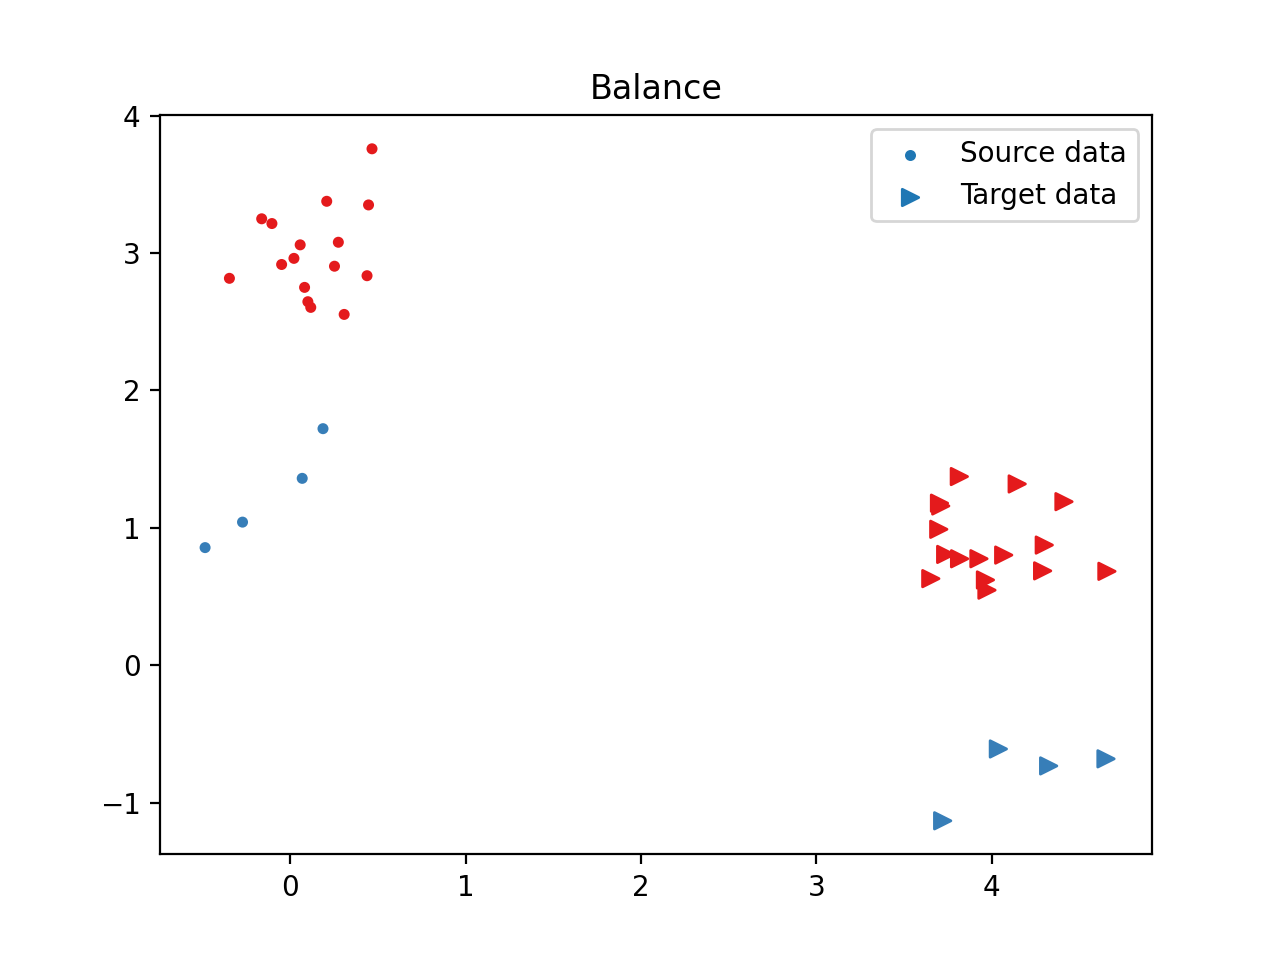

<IPython.core.display.Javascript object>


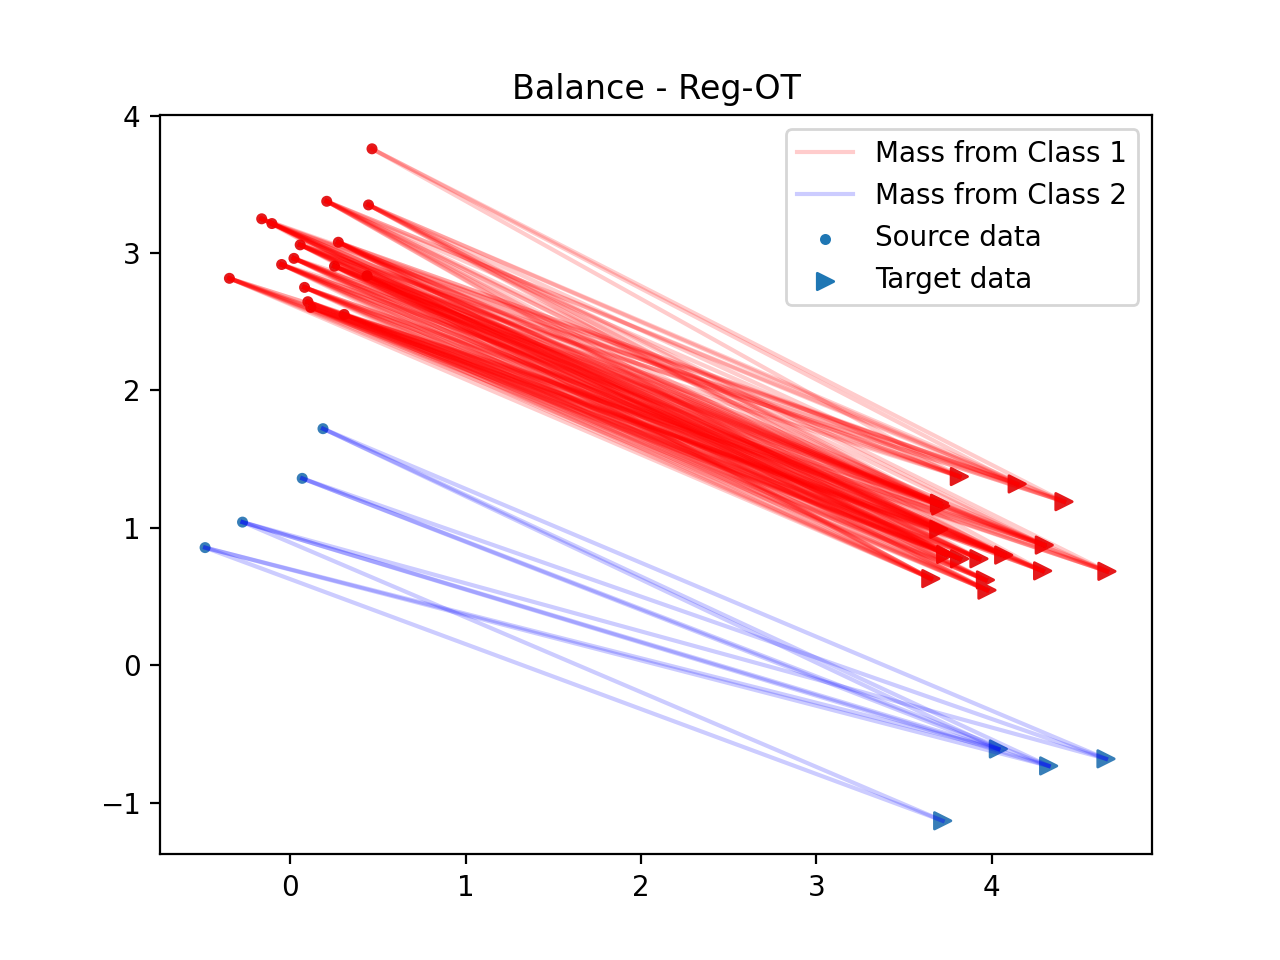

<IPython.core.display.Javascript object>


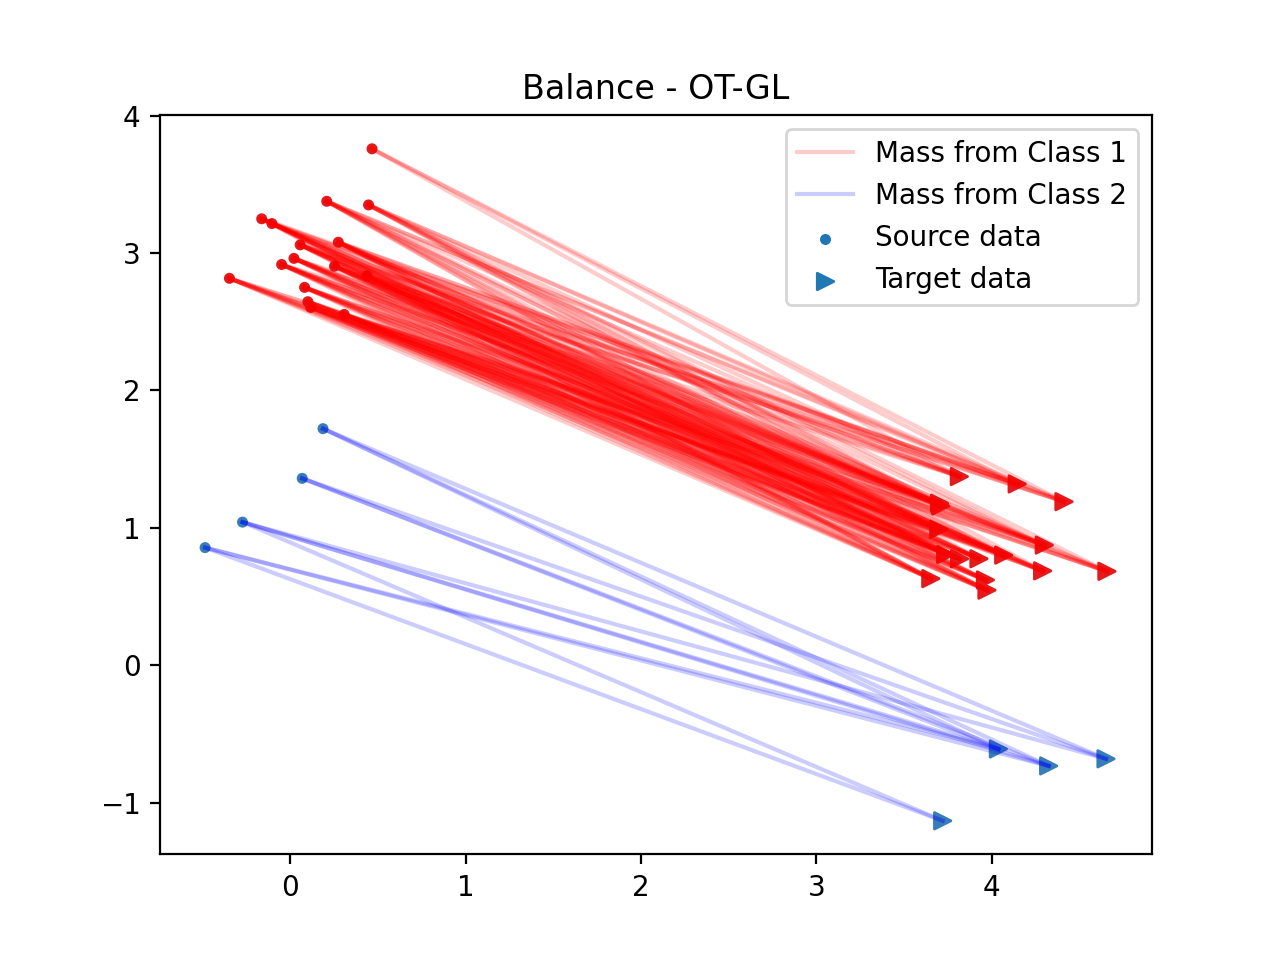

<IPython.core.display.Javascript object>


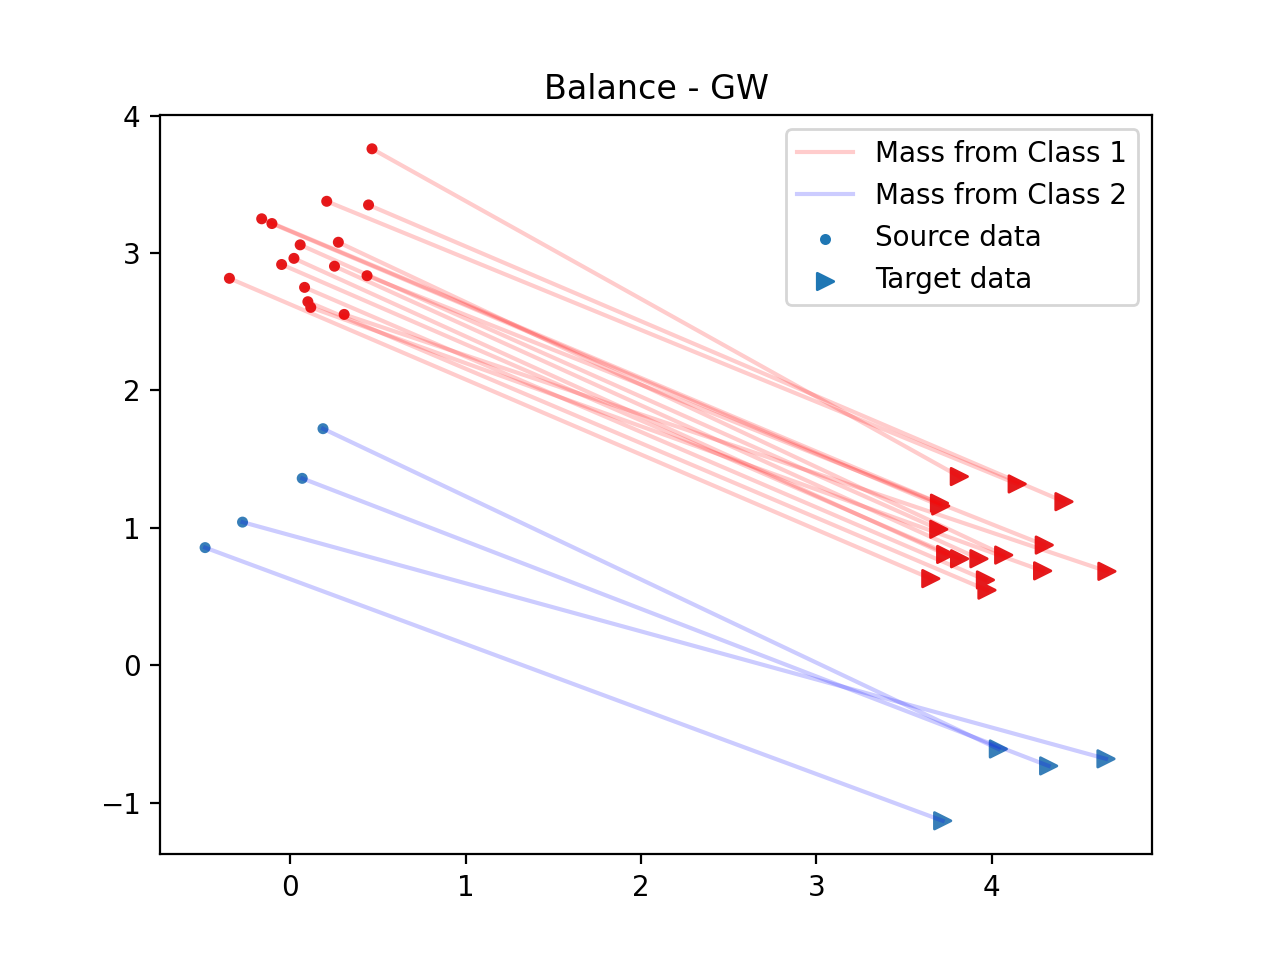

<IPython.core.display.Javascript object>


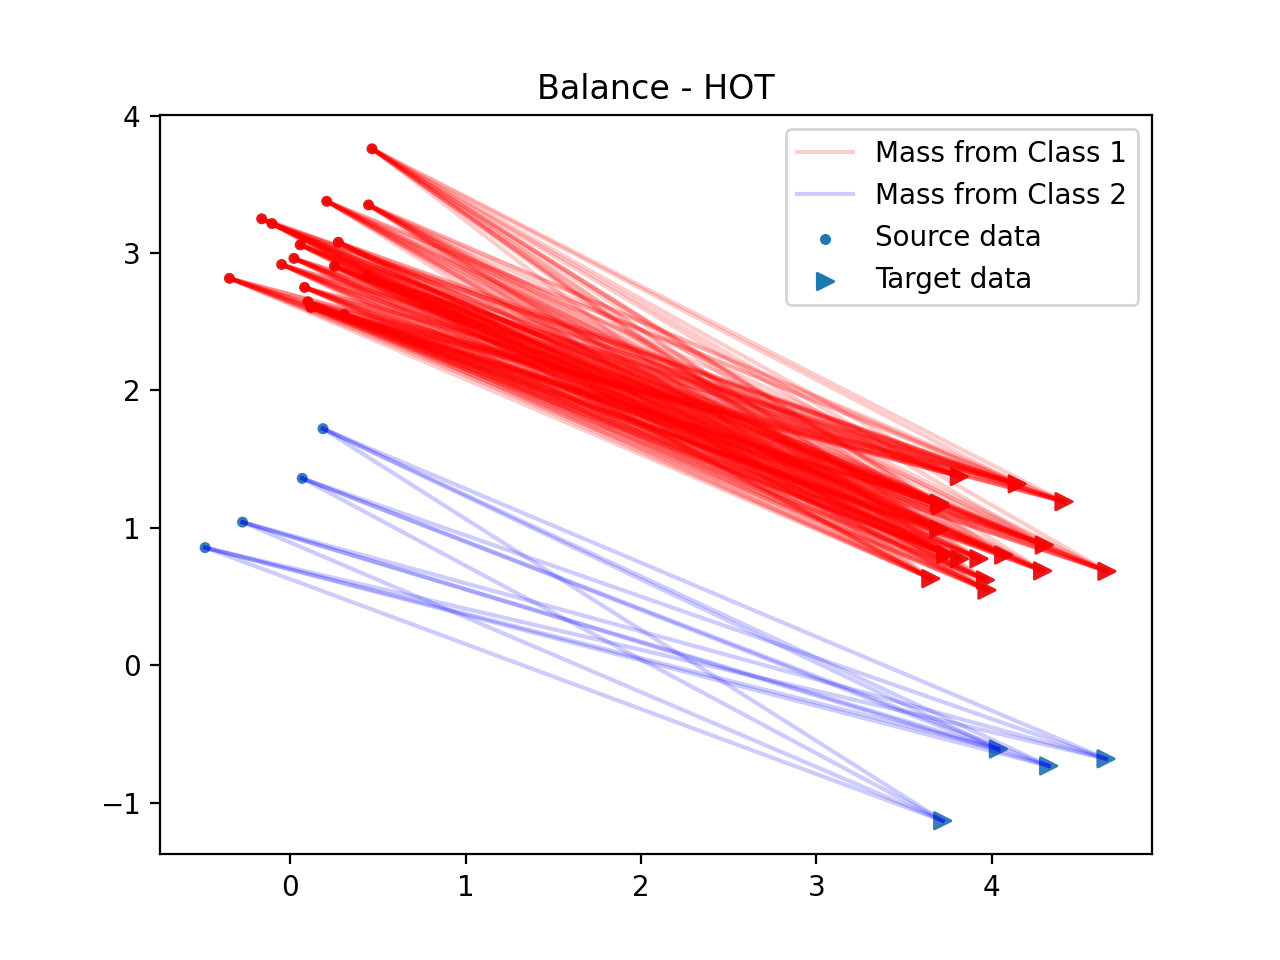

<IPython.core.display.Javascript object>


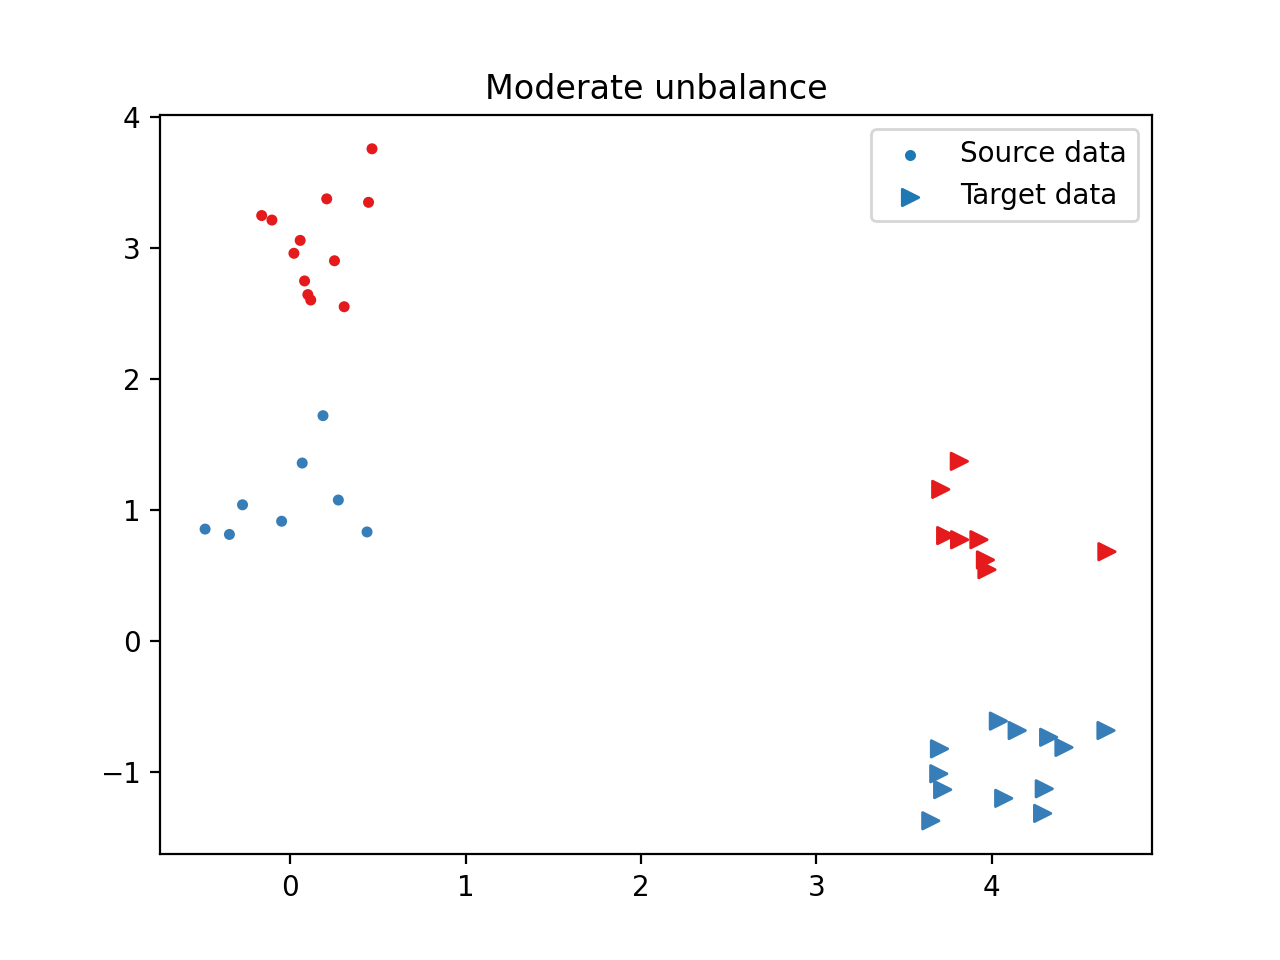

<IPython.core.display.Javascript object>


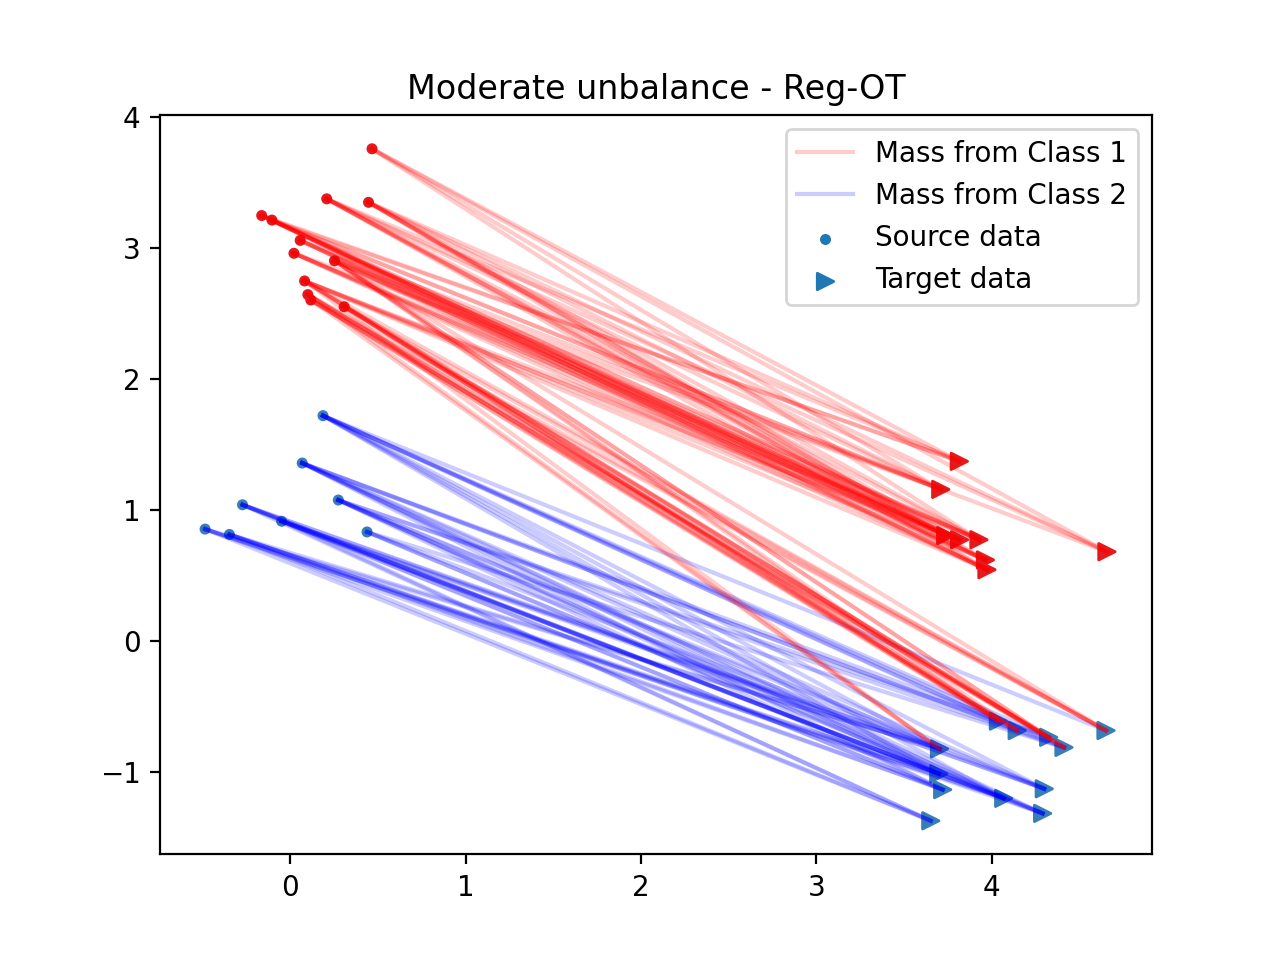

<IPython.core.display.Javascript object>


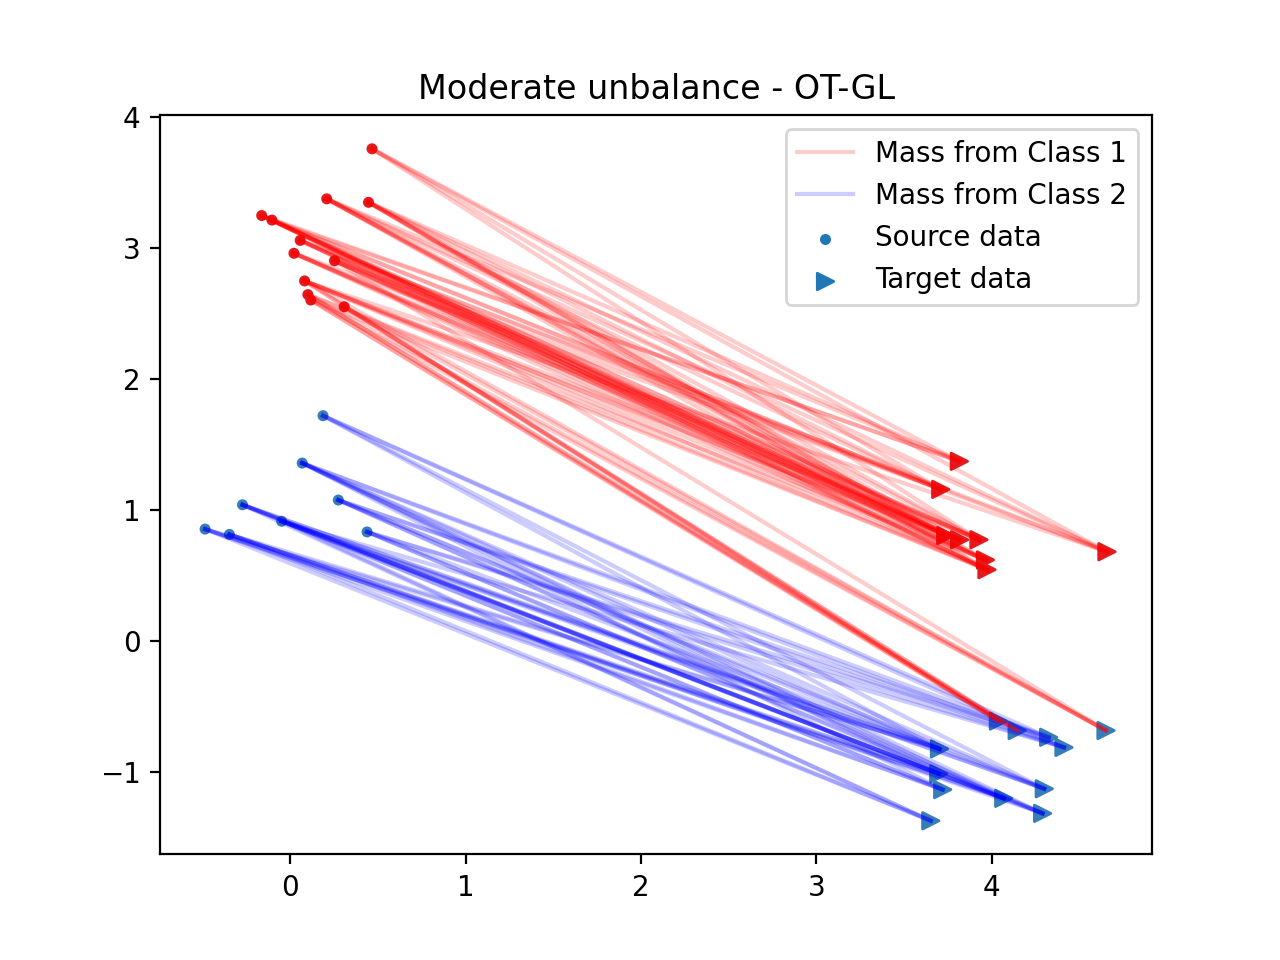

<IPython.core.display.Javascript object>


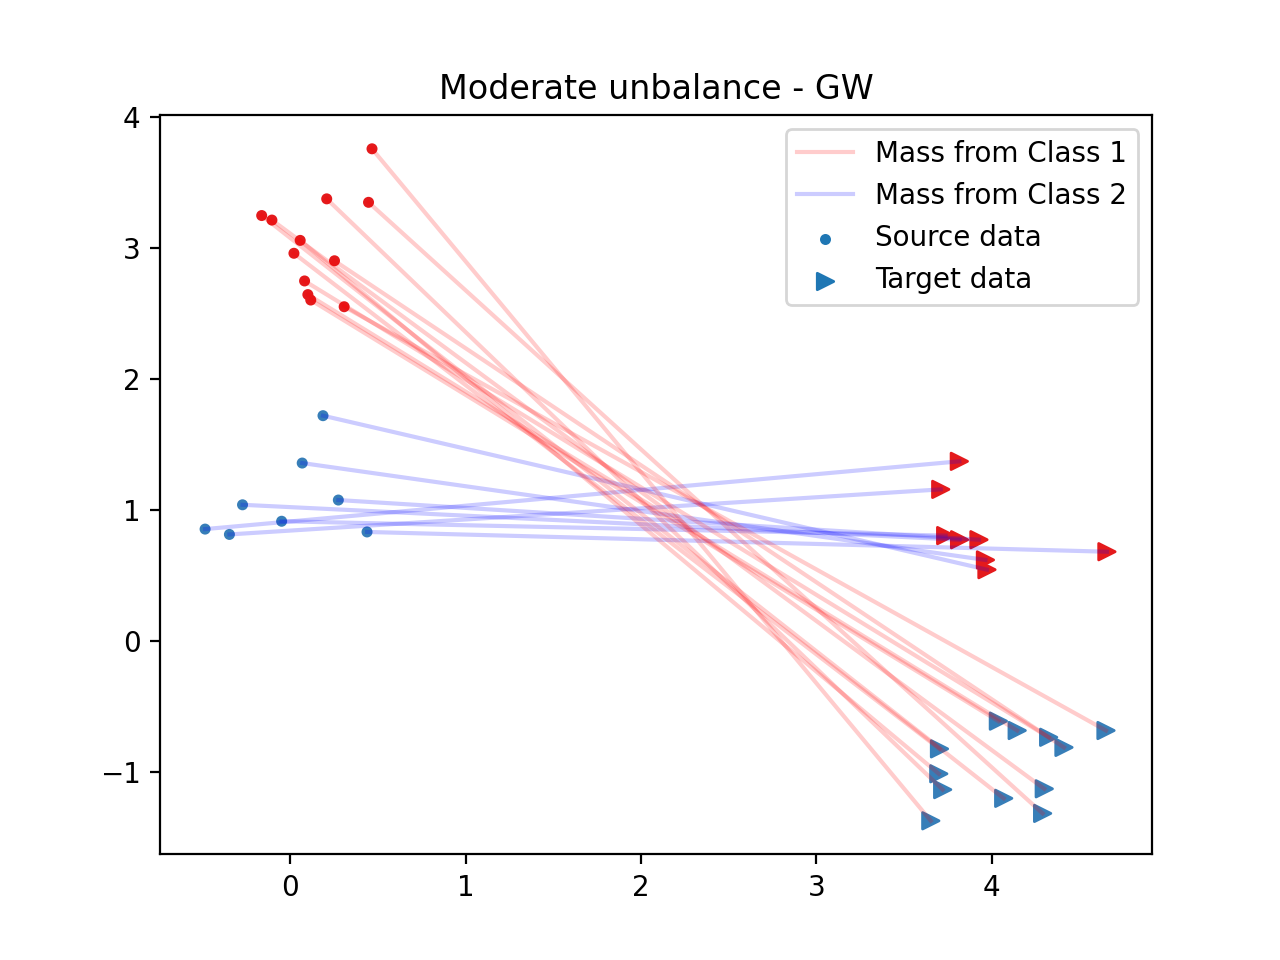

<IPython.core.display.Javascript object>


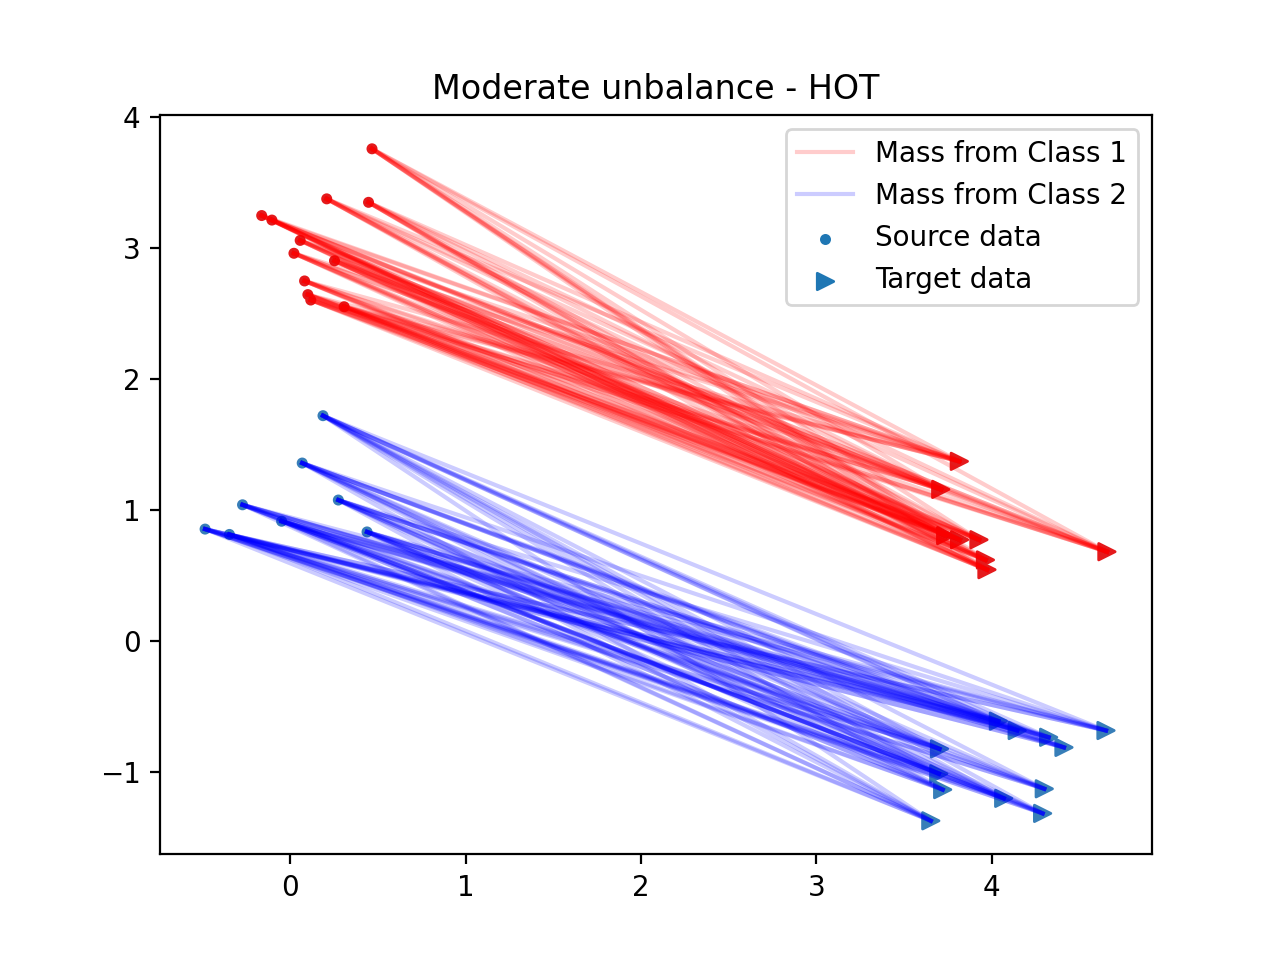

<IPython.core.display.Javascript object>


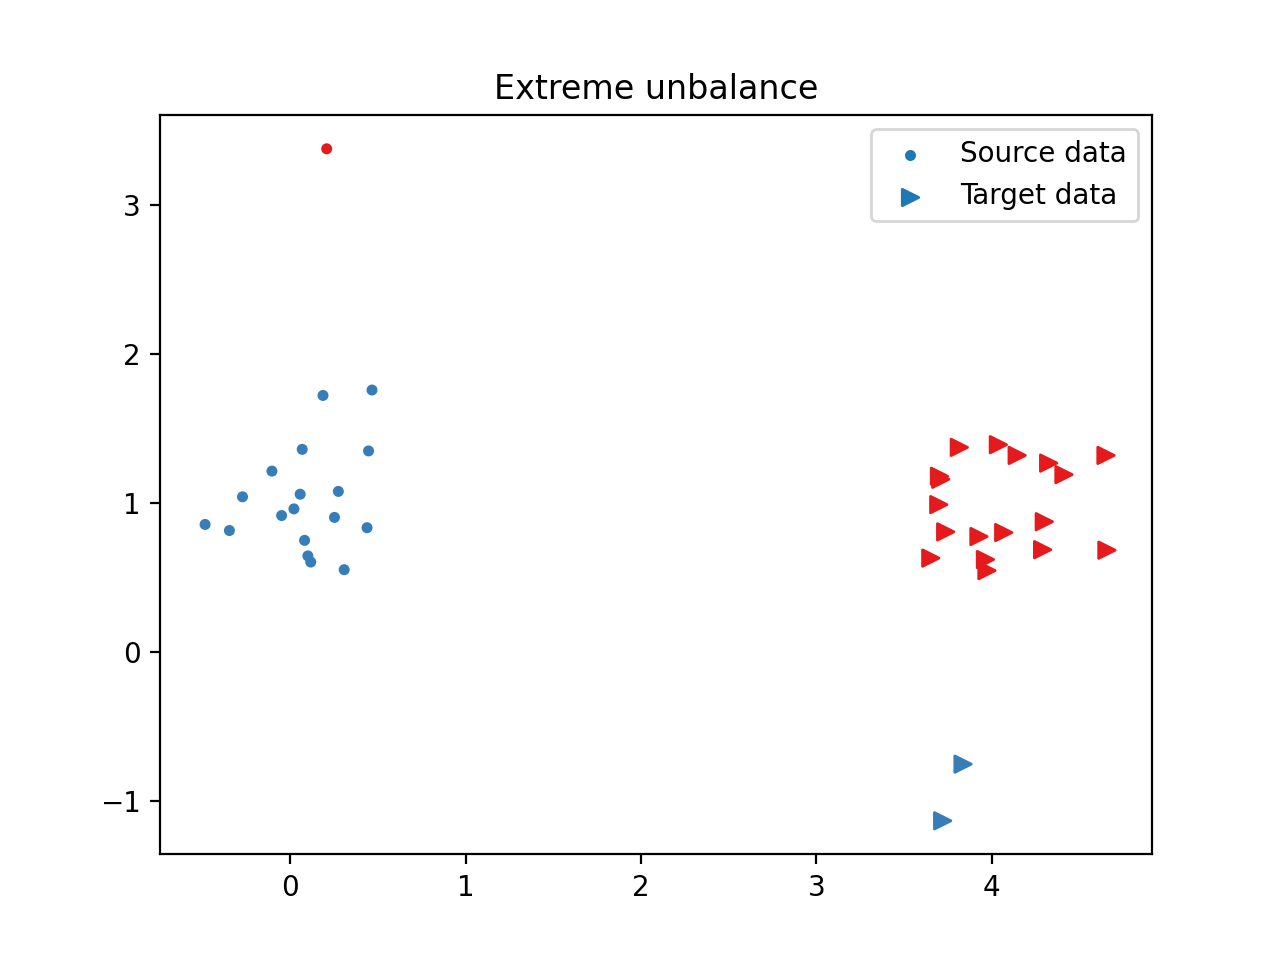

<IPython.core.display.Javascript object>


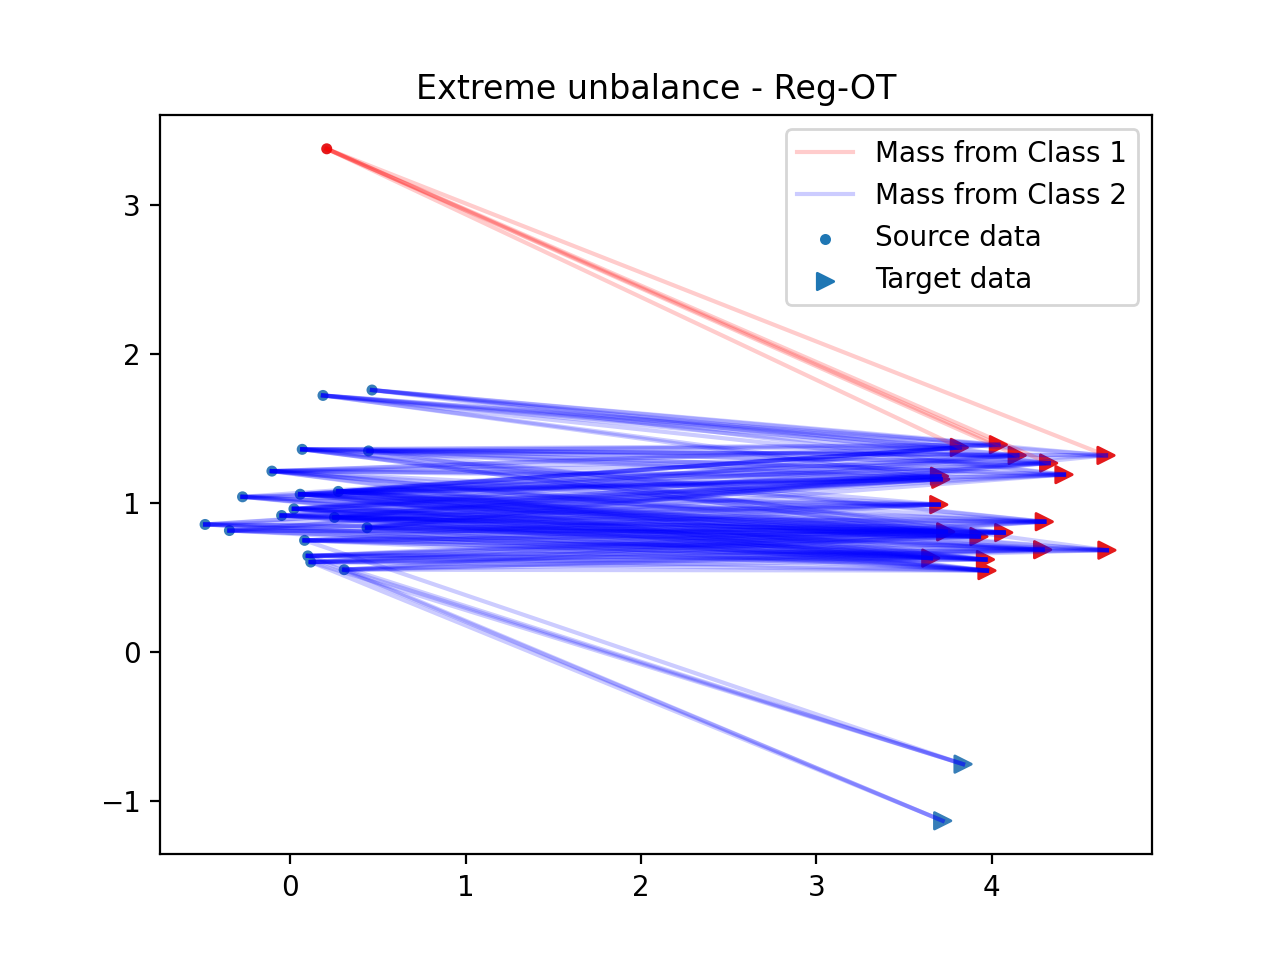

<IPython.core.display.Javascript object>


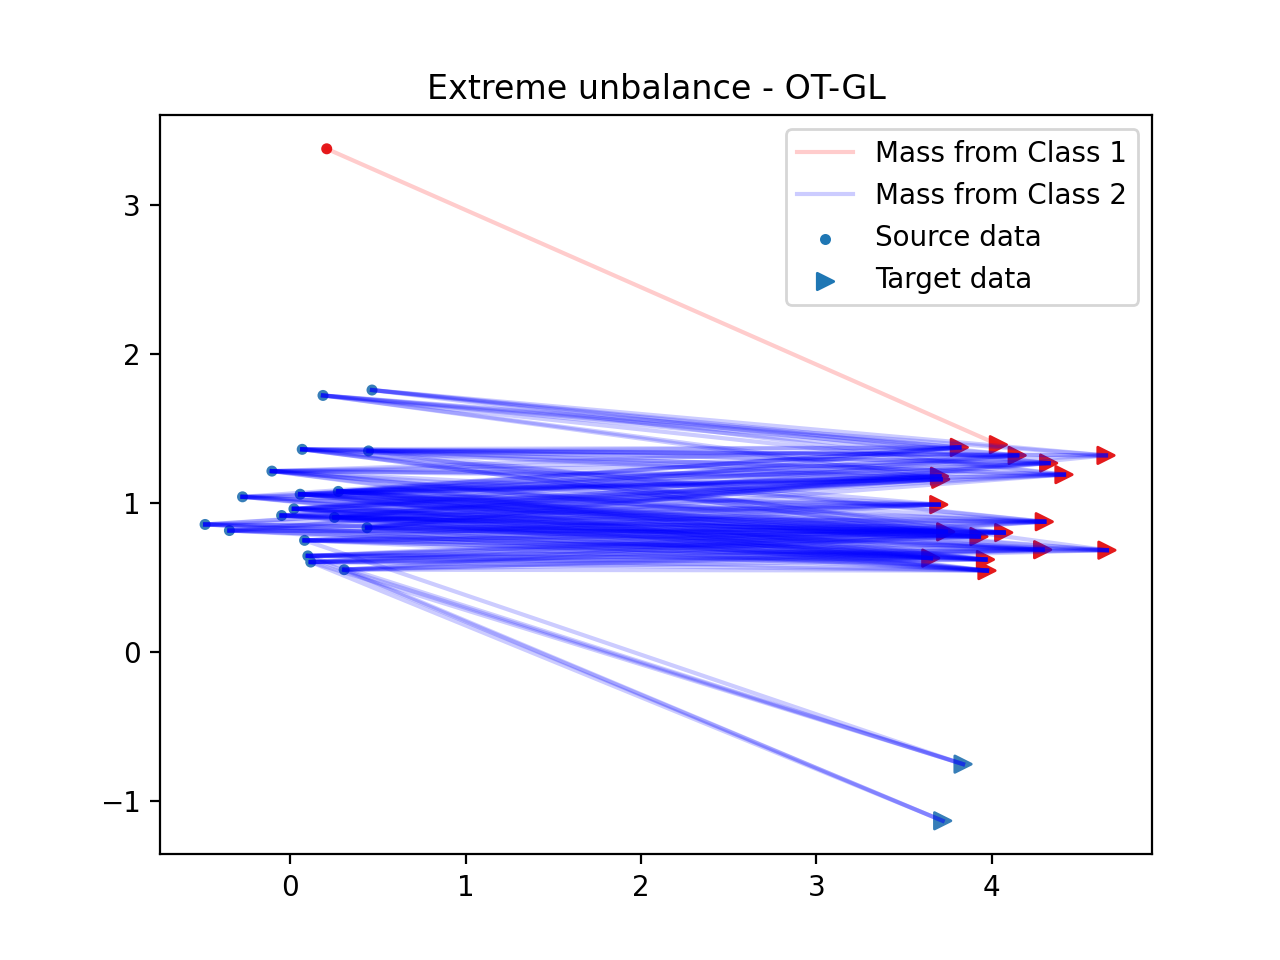

<IPython.core.display.Javascript object>


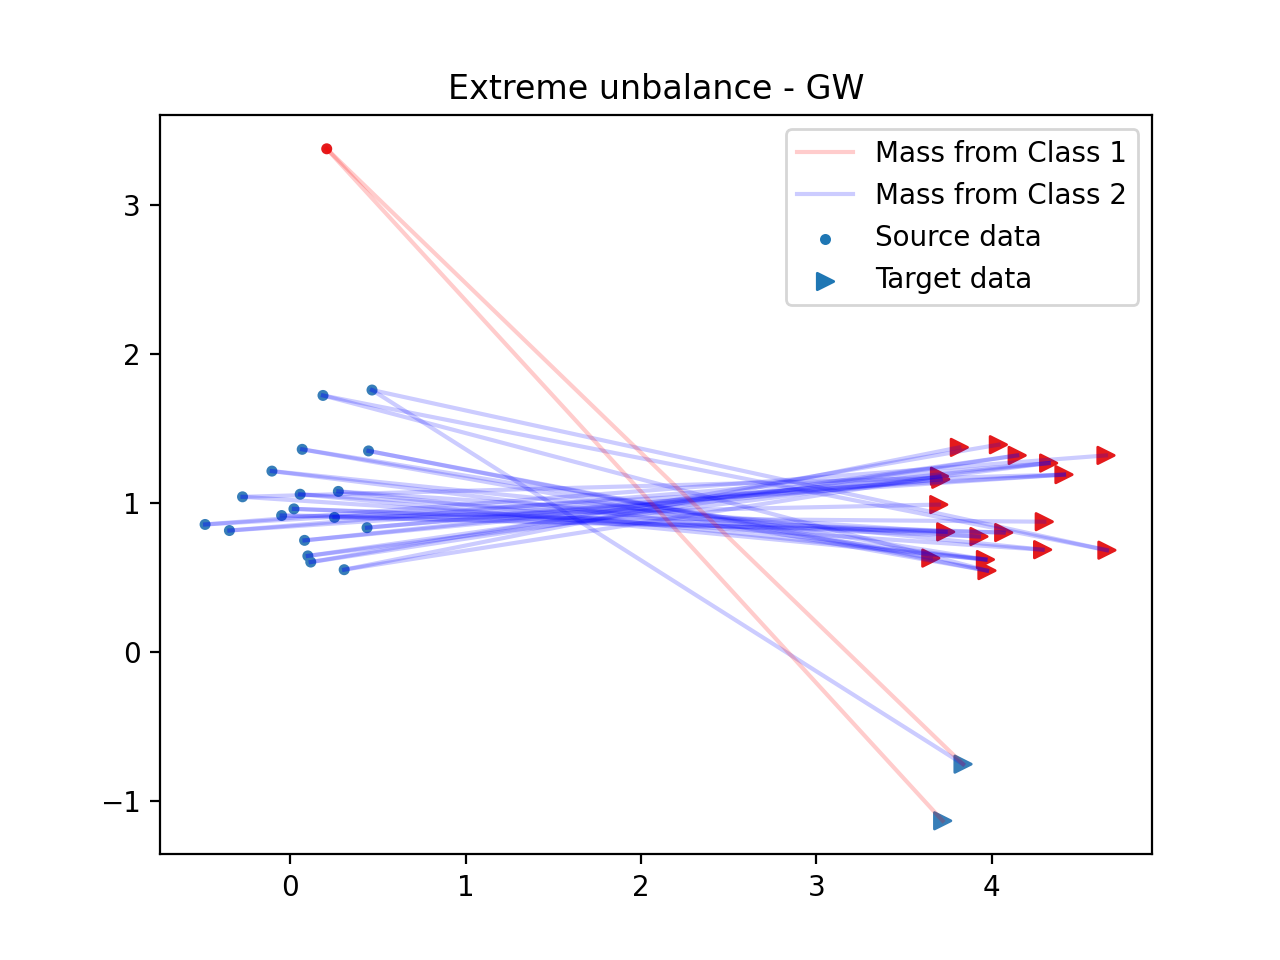

<IPython.core.display.Javascript object>


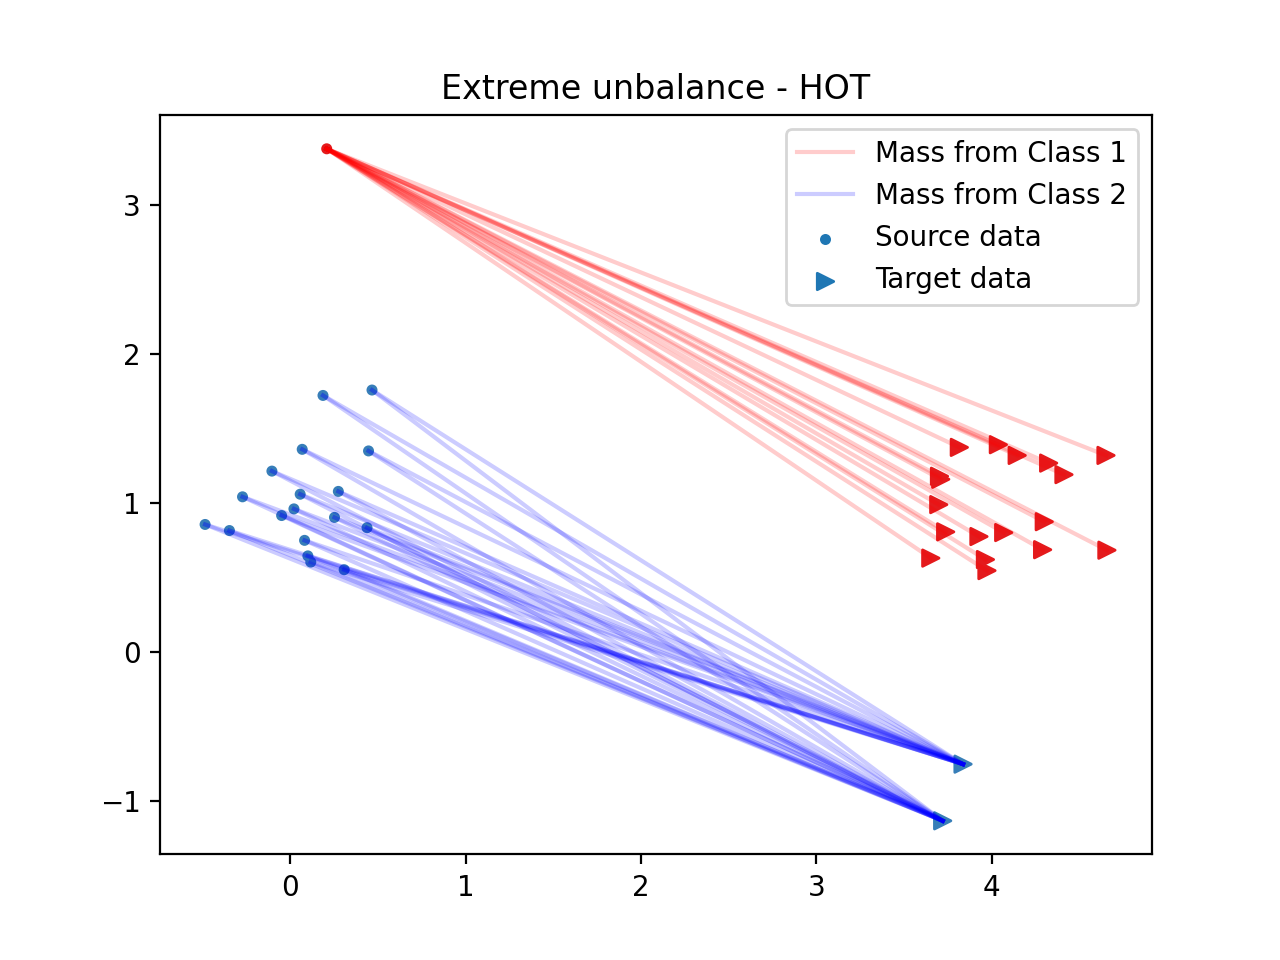

In [11]:
for m in [[0.2,0.2],[0.4,0.6],[0.9,0.1]]:
    unbalance=m[1]-m[0]
    p1=m[0]
    pt=m[1]
    n = 20
    sigma = 0.3
    np.random.seed(1985)
    dec1 = [0, 2]
    dect = [4, 0]
    xs1, ys1 = make_data_classif('2gauss_prop', n, nz=sigma, p=p1, bias=dec1)
    xt, yt = make_data_classif('2gauss_prop', n, nz=sigma, p=pt, bias=dect)
    plot_data(xs1, ys1,xt, yt,unbalance)
    plot_Reg_OT(xs1, ys1,xt, yt,unbalance)
    plot_OT_GL(xs1, ys1,xt, yt,unbalance)
    plot_GW(xs1, ys1,xt, yt,unbalance)
    plot_HOT(xs1, ys1,xt, yt,unbalance)
    

